<a href="https://www.kaggle.com/code/hassaneskikri/drinking-water-probability-prediction-using-h2o-au?scriptVersionId=192809351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-size: 35px;
           text-align:center;
           padding: 10px;
           border: 2px solid #333;
           border-radius: 8px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;">Drinking water probability prediction using H2O AutoML</h1>

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">1. Overview</span></h1>

<p style="font-size:16px;
          background-color:#333;
          border-radius:7px;
          margin: 2px auto;
          padding: 10px;">In this project, we focus on developing a machine learning model to predict the potability (drinkability) of water using a dataset that includes various chemical features of water samples. Ensuring the safety of drinking water is crucial for public health, and predictive models can help assess water quality quickly and accurately.<p>

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">2. What is H2O automl</span></h1>

<p style="font-size:16px;
          background-color:#333;
          border-radius:7px;
          margin: 2px auto;
          padding: 10px;">H2O AutoML is an automated machine learning tool provided by the H2O.ai platform. It simplifies the process of applying machine learning by automatically training and tuning models. H2O AutoML handles:<p>

- `Model Selection:` It explores a variety of algorithms such as Gradient Boosting Machines (GBM), Deep Learning, and others.
- `Hyperparameter Tuning:` Automatically tunes hyperparameters to find the best configuration for each algorithm.
- `Ensembling:` Combines the strengths of different models through stacking to improve prediction accuracy.
- `Model Ranking:` Ranks models based on performance metrics and selects the best one.

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">3. importing liberaries</span></h1>

In [1]:
import h2o
!pip show h2o

Name: h2o
Version: 3.46.0.3
Summary: H2O, Fast Scalable Machine Learning, for python 
Home-page: https://github.com/h2oai/h2o-3.git
Author: H2O.ai
Author-email: support@h2o.ai
License: Apache v2
Location: /opt/conda/lib/python3.10/site-packages
Requires: requests, tabulate
Required-by: 


In [2]:
from h2o.automl import H2OAutoML
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# modeling
from sklearn.ensemble import RandomForestClassifier

# for model accuracy
from sklearn.metrics import accuracy_score

# for scaling
from sklearn.preprocessing import StandardScaler

#for hyperparameter 
import optuna

import warnings
warnings.filterwarnings("ignore")
#initilize the h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3gq_9zjl
  JVM stdout: /tmp/tmp3gq_9zjl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3gq_9zjl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_l7g0zl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.250 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">3. Load and preprocess the data</span></h1>

In [3]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
shape = df.shape
print('the shape of the dataset is : ',shape)

the shape of the dataset is :  (3276, 10)


In [5]:
info = df.info()
print("\ninfo about the dataset: \n")
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

info about the dataset: 

None


In [6]:
nunique = df.nunique()
print("\nnunique value in dataset \n",nunique)


nunique value in dataset 
 ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [7]:
summary = df.describe()
print("\ndata summary \n")
print(summary)


data summary 

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">4. Data Analysis</span></h1>

Potability
0    1998
1    1278
Name: count, dtype: int64


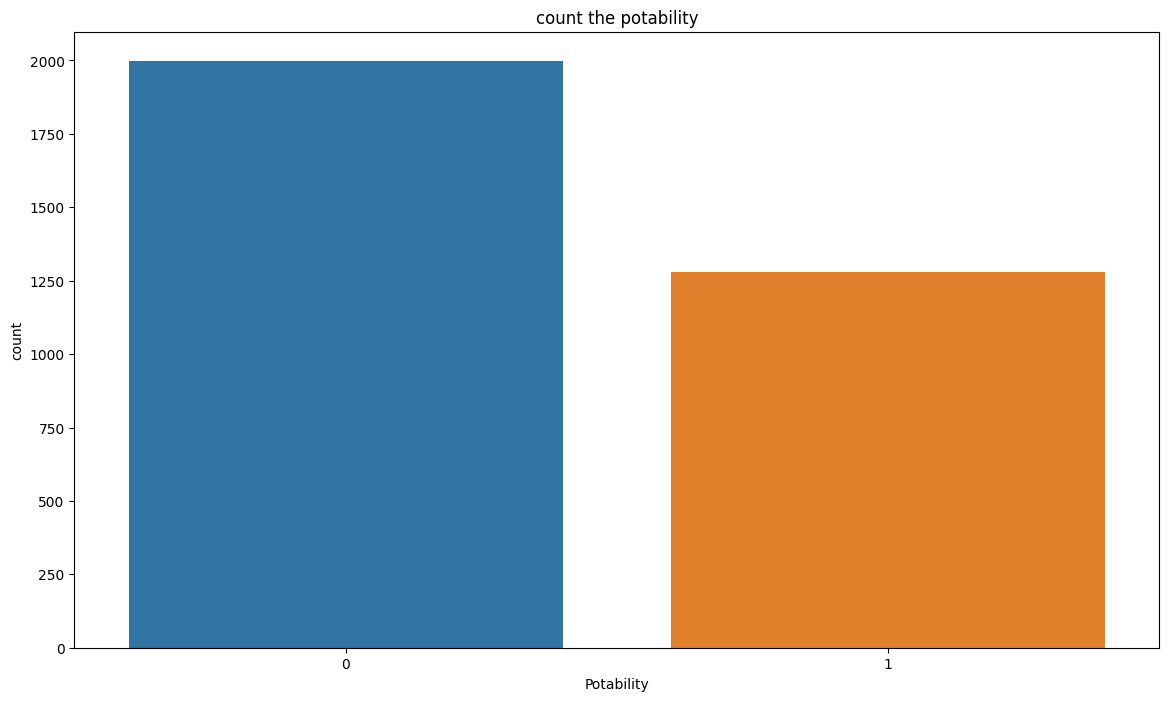

In [8]:
print(df.Potability.value_counts())
plt.figure(figsize=(14,8))
sns.countplot(data = df, x=df.Potability)
plt.title('count the potability')
plt.show()

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
null_values= ['ph','Sulfate','Trihalomethanes']

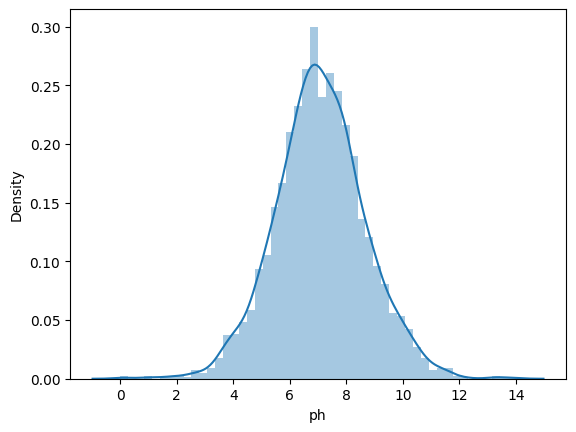

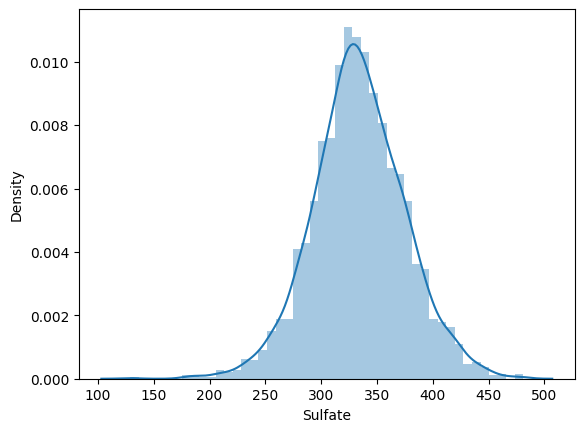

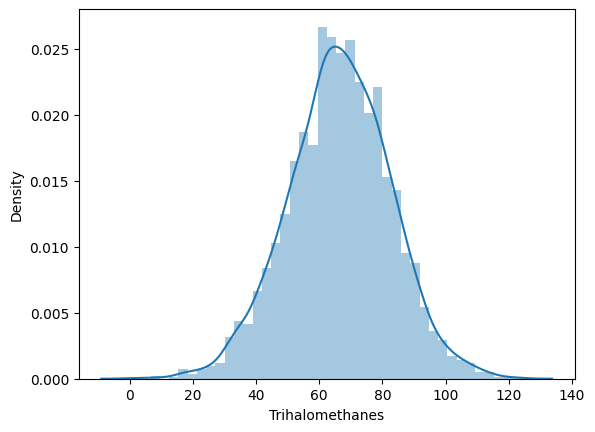

In [11]:
for i in null_values:
    sns.distplot(df[i])
    plt.show()

In [12]:
for i in null_values:
    df[i] = df[i].replace(np.nan, df[i].mean())

df.isnull().sum()
    

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
# sns.pairplot(data = df, hue='Potability')
# plt.show()

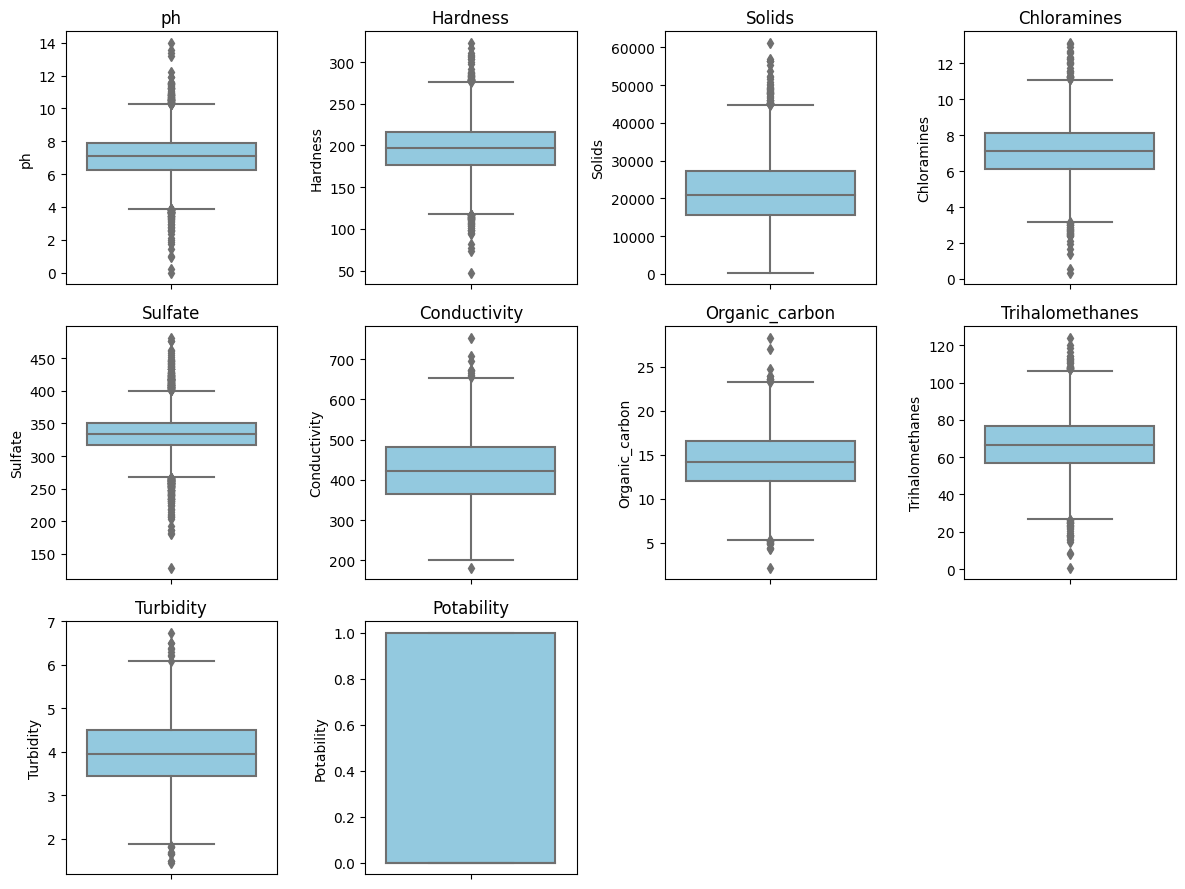

In [14]:
plt.figure(figsize=(12,9))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3,4,i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [15]:
corr = df[df.columns].corr()['Potability'].sort_values(ascending=False)
corr = corr.to_frame()
corr.style.background_gradient(cmap='RdYlBu')

,Potability
Potability,1.000000
Solids,0.033743
Chloramines,0.023779
Trihalomethanes,0.006960
Turbidity,0.001581
ph,-0.003287
Conductivity,-0.008128
Hardness,-0.013837
Sulfate,-0.020619
Organic_carbon,-0.030001


In [16]:
# handling outliers

# outliers detection

for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "---> theres are outliers here ")
    else:
        print(feature, " ---> everything is good ")

ph ---> theres are outliers here 
Hardness ---> theres are outliers here 
Solids ---> theres are outliers here 
Chloramines ---> theres are outliers here 
Sulfate ---> theres are outliers here 
Conductivity ---> theres are outliers here 
Organic_carbon ---> theres are outliers here 
Trihalomethanes ---> theres are outliers here 
Turbidity ---> theres are outliers here 
Potability  ---> everything is good 


In [17]:
target = 'Potability'
features = df.columns.drop(target)

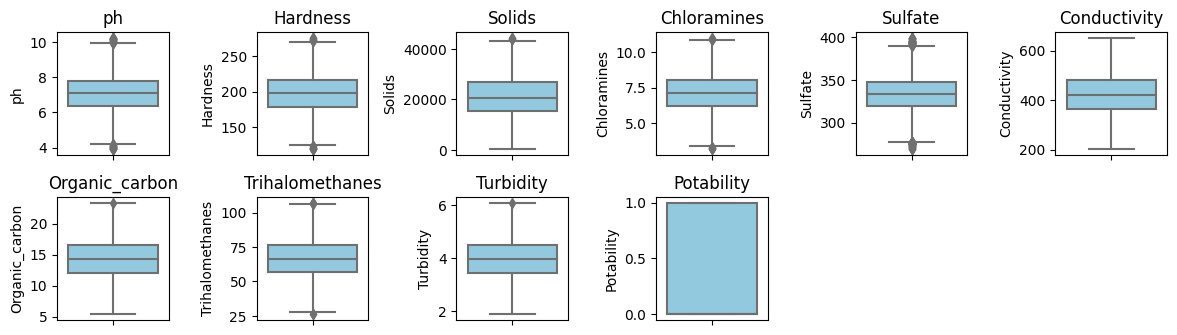

In [18]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the specified columns
df = remove_outliers(df,features)

plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[column],color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">4. Data Scaling</span></h1>

In [19]:
X = df[features]
y = df[target]

In [20]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled, columns=X.columns)

In [21]:
scaled_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03,2.657000e+03
mean,1.176661e-16,-9.152550e-16,1.016207e-16,-1.149919e-16,1.353160e-15,9.373174e-16,6.525120e-16,-5.321716e-16,-2.487033e-16
std,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00
min,-2.614852e+00,-2.759914e+00,-2.685915e+00,-2.776256e+00,-2.483149e+00,-2.805253e+00,-2.780292e+00,-2.693757e+00,-2.744760e+00
25%,-5.965690e-01,-6.365241e-01,-7.434051e-01,-6.515155e-01,-5.375265e-01,-7.524066e-01,-6.920342e-01,-6.362293e-01,-6.867132e-01
50%,2.385405e-03,1.874906e-02,-1.132029e-01,3.947738e-03,-2.899143e-03,-5.654853e-02,-2.577660e-02,-5.353085e-03,-1.992509e-02
75%,5.895489e-01,6.603029e-01,6.687477e-01,6.665796e-01,5.361403e-01,6.956958e-01,7.003650e-01,6.824039e-01,6.990652e-01
max,2.614438e+00,2.784467e+00,2.910249e+00,2.756749e+00,2.504489e+00,2.838814e+00,2.805934e+00,2.726769e+00,2.786435e+00


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">5. Feature Importances</span></h1>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# train a random forest model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_train_pred = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.6541


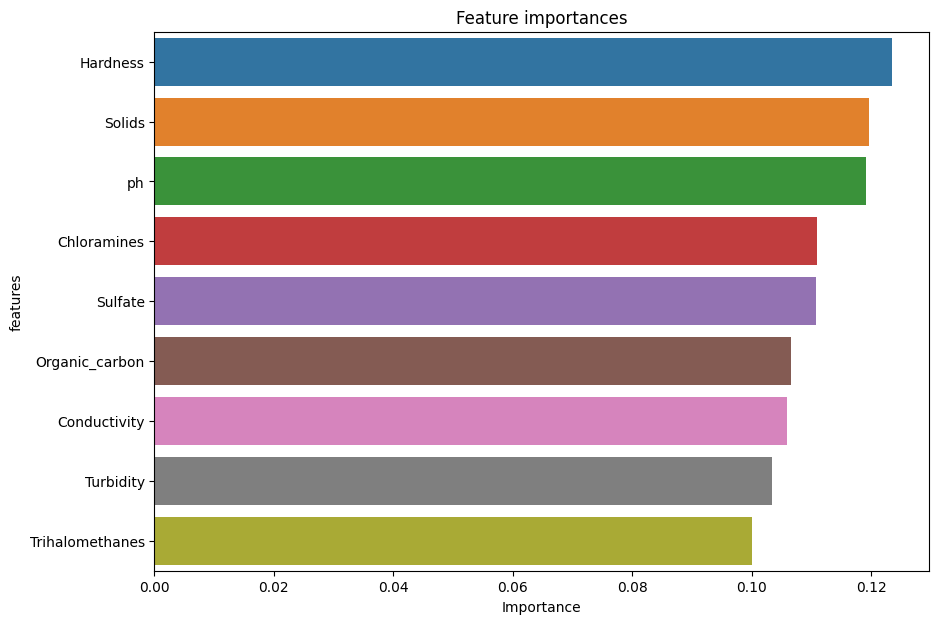

In [25]:
# Get the feature importance
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending =False)

#plot them

plt.figure(figsize=(10,7))
sns.barplot(x=feature_importances, y = feature_importances.index)
plt.title('Feature importances')
plt.xlabel("Importance")
plt.ylabel("features")
plt.show()

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">6. Hyperparameter optimization</span></h1>

In [26]:
def objective(trial):
    # define the hyperparameters 
    n_estimators = trial.suggest_int('n_estimators',50, 300)
    max_depth = trial.suggest_int('max_depth',3, 20)
    min_samples_split = trial.suggest_int('min_samples_split',2,10)
    min_samples_leaf =trial.suggest_int('min_samples_leaf', 1,10)
    max_features = trial.suggest_categorical('max_features',['auto','sqrt','log2'])
    
    # create a RFC with the hyperparameters
    rf = RandomForestClassifier(
    n_estimators = n_estimators,
    max_depth = max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    max_features = max_features,
    random_state = 42
    )
    
    # evaluate the model using CV
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    
    # because optuna minimize the objective we will return the negative of the accuracy
    return -scores.mean()

# create a study object
study = optuna.create_study(direction='maximize', study_name="optuna_optimization")

[I 2024-08-16 00:06:44,497] A new study created in memory with name: optuna_optimization


In [27]:
# run the optimization
study.optimize(objective, n_trials=100)

[I 2024-08-16 00:06:48,152] Trial 0 finished with value: -0.6432941176470589 and parameters: {'n_estimators': 127, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.6432941176470589.
[I 2024-08-16 00:06:51,442] Trial 1 finished with value: -0.6432941176470589 and parameters: {'n_estimators': 103, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'auto'}. Best is trial 0 with value: -0.6432941176470589.
[I 2024-08-16 00:06:56,124] Trial 2 finished with value: -0.6437647058823529 and parameters: {'n_estimators': 176, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.6432941176470589.
[I 2024-08-16 00:06:58,670] Trial 3 finished with value: -0.648 and parameters: {'n_estimators': 88, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: -0.6432941176470589.

In [28]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters: ", best_params)

# Get the best score
best_score = study.best_value
print("Best Score: ", -best_score)

Best Hyperparameters:  {'n_estimators': 238, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Score:  0.6197647058823529


In [29]:
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Train Accuracy: 0.6315
Test Accuracy: 0.6560


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">7. using H2O Auto ML</span></h1>

In [30]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [31]:
#Convert to H2OFrame
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
#initilize automl
aml = H2OAutoML(max_runtime_secs=500,
               balance_classes=True,
               max_models =20,
               seed =10,
               verbosity='info',
               nfolds=2)

In [33]:
target = 'Potability'
features = df.columns.tolist()
features.remove(target)

In [34]:
# fitting the model
aml.train(x=features, y=target, training_frame = train_h2o)

AutoML progress: |
00:13:26.69: Project: AutoML_1_20240816_01326
00:13:26.70: Setting stopping tolerance adaptively based on the training frame: 0.021693045781865615
00:13:26.70: Build control seed: 10
00:13:26.71: training frame: Frame key: AutoML_1_20240816_01326_training_Key_Frame__upload_961a133a5957258c906d32c9f21e461b.hex    cols: 10    rows: 2125  chunks: 1    size: 153948  checksum: -6641129128411067340
00:13:26.71: validation frame: NULL
00:13:26.71: leaderboard frame: NULL
00:13:26.71: blending frame: NULL
00:13:26.71: response column: Potability
00:13:26.72: fold column: null
00:13:26.72: weights column: null
00:13:26.97: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [35]:
# to view all the models that been used :
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240816_01326,0.477124,0.227647,0.455446,0.335495,0.227647
StackedEnsemble_AllModels_1_AutoML_1_20240816_01326,0.477569,0.228072,0.456197,0.335981,0.228072
XGBoost_grid_1_AutoML_1_20240816_01326_model_4,0.481483,0.231826,0.442275,0.339125,0.231826
GBM_grid_1_AutoML_1_20240816_01326_model_7,0.483633,0.233901,0.454768,0.340184,0.233901
GBM_1_AutoML_1_20240816_01326,0.483656,0.233923,0.465107,0.340365,0.233923
GBM_grid_1_AutoML_1_20240816_01326_model_11,0.483668,0.233935,0.447883,0.340516,0.233935
GBM_5_AutoML_1_20240816_01326,0.483939,0.234197,0.457443,0.340821,0.234197
GBM_grid_1_AutoML_1_20240816_01326_model_14,0.483944,0.234202,0.46084,0.340755,0.234202
XRT_1_AutoML_1_20240816_01326,0.484535,0.234775,0.450673,0.340743,0.234775
GBM_grid_1_AutoML_1_20240816_01326_model_15,0.484776,0.235008,0.463303,0.340843,0.235008


In [36]:
best_model = aml.leader


# evaluate performance on test data
perf = best_model.model_performance(test_h2o)

print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.21837414663297544
RMSE: 0.4673051964540684
MAE: 0.44428469594444103
RMSLE: 0.3322631714494348
Mean Residual Deviance: 0.21837414663297544
R^2: 0.03477754128168342
Null degrees of freedom: 531
Residual degrees of freedom: 528
Null deviance: 121.00670272664402
Residual deviance: 116.17504600874294
AIC: 710.2884367723358


In [37]:
# predict on test data 
predictions = best_model.predict(test_h2o)

# convert to pandas df
pred_df = predictions.as_data_frame()
print(pred_df.head())

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
    predict
0  0.298332
1  0.279505
2  0.589286
3  0.356588
4  0.234845


In [38]:
pred_df['predict'] = pred_df['predict'].apply(lambda x: 1 if x>0.5 else 0)
print(pred_df['predict'].head())

0    0
1    0
2    1
3    0
4    0
Name: predict, dtype: int64


In [39]:
actual_df = test[target]
actual_df.head(5)

1010    0
158     0
1755    0
1980    1
867     0
Name: Potability, dtype: int64

In [40]:
accuracy = accuracy_score(actual_df, pred_df['predict'])
print(f"Accuracy of the best model:{accuracy:.4f}")

Accuracy of the best model:0.6579
